QUESTION 1:

In [445]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

# Load the dataset
data = pd.read_excel("Real estate valuation data set.xlsx")

In [446]:
# print the first 5 rows of the data
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [447]:
# print the first column
data.iloc[:, 0]

0        1
1        2
2        3
3        4
4        5
      ... 
409    410
410    411
411    412
412    413
413    414
Name: No, Length: 414, dtype: int64

In [448]:
# print the second column
data.iloc[:, 1]

0      2012.916667
1      2012.916667
2      2013.583333
3      2013.500000
4      2012.833333
          ...     
409    2013.000000
410    2012.666667
411    2013.250000
412    2013.000000
413    2013.500000
Name: X1 transaction date, Length: 414, dtype: float64

In [449]:
# Prepare the data (input and output)
X = data.iloc[:, 1:7]  # Extract columns 1 to 6 as input
y = data.iloc[:, -1] # Extract the last column as output (this is the house price variable)

In [450]:
# check X and y
X

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.916667,32.0,84.87882,10,24.98298,121.54024
1,2012.916667,19.5,306.59470,9,24.98034,121.53951
2,2013.583333,13.3,561.98450,5,24.98746,121.54391
3,2013.500000,13.3,561.98450,5,24.98746,121.54391
4,2012.833333,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381
410,2012.666667,5.6,90.45606,9,24.97433,121.54310
411,2013.250000,18.8,390.96960,7,24.97923,121.53986
412,2013.000000,8.1,104.81010,5,24.96674,121.54067


In [451]:
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

In [452]:
# Split the data into training/testing sets (80% for training and 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [453]:
# check the size of the training and testing sets
print("X_train size:", X_train.shape)
print("X_test size:", X_test.shape)
print("y_train size:", y_train.shape)
print("y_test size:", y_test.shape)

X_train size: (331, 6)
X_test size: (83, 6)
y_train size: (331,)
y_test size: (83,)


In [454]:
# Create linear regression object
model = LinearRegression()

In [455]:
# Fit the model using the training sets
model.fit(X_train, y_train)

LinearRegression()

In [456]:
# Make predictions using the testing set
y_pred = model.predict(X_test)

In [457]:
# check the predicted values via performance metrics (MSE, MAE, R2, EVS)
print("Mean squared error (MSE): %.2f" % mean_squared_error(y_test, y_pred))
print("Mean absolute error (MAE): %.2f" % mean_absolute_error(y_test, y_pred))
print("Coefficient of determination (R2): %.2f" % r2_score(y_test, y_pred))
print("Explained variance score (EVS): %.2f" % explained_variance_score(y_test, y_pred))

Mean squared error (MSE): 53.50
Mean absolute error (MAE): 5.31
Coefficient of determination (R2): 0.68
Explained variance score (EVS): 0.68


Results:
Mean Squared Error (MSE): 53.50
The MSE measures the average squared difference between the predicted and actual house prices. An MSE of 53.50 means that, on average, the model's predictions are off by the square root of 53.50 (which is approximately 7.31) multiplied by the unit of the target variable (10000 New Taiwan Dollar/Ping). The lower the MSE, the better the model's performance. However, the MSE is sensitive to outliers, as it squares the errors.

Mean Absolute Error (MAE): 5.31
The MAE measures the average absolute difference between the predicted and actual house prices. An MAE of 5.31 means that, on average, the model's predictions are off by 5.31 multiplied by the unit of the target variable (10000 New Taiwan Dollar/Ping). The MAE is less sensitive to outliers compared to the MSE and provides a more interpretable measure of the model's performance.

Coefficient of Determination (R2): 0.68
The R2 score is a measure of how well the model's predictions match the variance of the actual house prices. An R2 score of 0.68 indicates that the model explains 68% of the variance in the house prices. Generally, an R2 score closer to 1 indicates a better model fit. However, a high R2 score alone doesn't guarantee a good model, as it can be affected by the number of predictors used in the model.

Explained Variance Score (EVS): 0.68
The EVS measures the proportion of the total variance in the actual house prices that is explained by the model. An EVS of 0.68 indicates that 68% of the variance in the house prices can be explained by the model's predictions. Similar to the R2 score, a higher EVS indicates a better model fit.

In conclusion, the linear regression model seems to have a moderate performance in predicting house prices, as it explains 68% of the variance in the house prices. However, there's room for improvement.

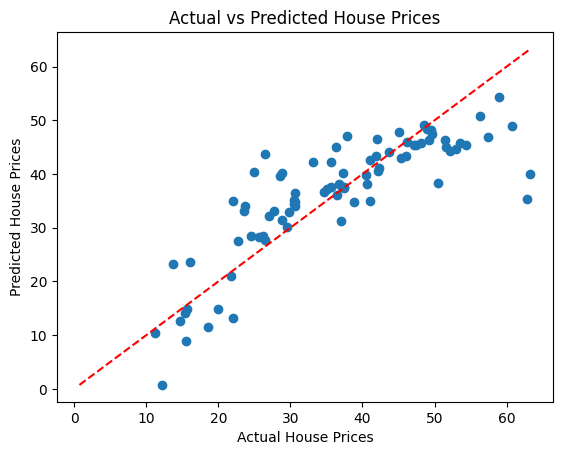

In [458]:
import matplotlib.pyplot as plt

# Plot actual vs predicted house prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted House Prices")

# Add a diagonal line representing perfect predictions
diagonal_line = np.linspace(min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max()), 100)
plt.plot(diagonal_line, diagonal_line, color='red', linestyle='--')

plt.show()

The graph above of a scatterplot shows actual vs predicted house prices with the diagonal red line being a representation of what a perfect/ideal prediction would look like. The closer the scatterplot points are to the red line, the better the model is at predicting house prices.

QUESTION 2: Applying PCA (Principal Component Analysis) to the dataset with the first 3 components, and then applying linear regression to the transformed data. Compare the results with the previous model. Let's see which model is better!

In [459]:
from sklearn.decomposition import PCA
# Apply PCA and keep the first 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X) # Transform the input data

In [460]:
# check the shape of the transformed data
X_pca.shape

(414, 3)

In [461]:
# Split the data into training/testing sets (80% for training and 20% for testing)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [462]:
# Create linear regression object
model_pca = LinearRegression()

In [463]:
# Fit the model using the training sets
model_pca.fit(X_train_pca, y_train_pca)

LinearRegression()

In [464]:
# Make predictions using the testing set
y_pred_pca = model_pca.predict(X_test_pca)

In [465]:
# check the predicted values via performance metrics (MSE, MAE, R2, EVS)
print("Mean squared error (MSE): %.2f" % mean_squared_error(y_test_pca, y_pred_pca))
print("Mean absolute error (MAE): %.2f" % mean_absolute_error(y_test_pca, y_pred_pca))
print("Coefficient of determination (R2): %.2f" % r2_score(y_test_pca, y_pred_pca))
print("Explained variance score (EVS): %.2f" % explained_variance_score(y_test_pca, y_pred_pca))

Mean squared error (MSE): 58.88
Mean absolute error (MAE): 5.63
Coefficient of determination (R2): 0.65
Explained variance score (EVS): 0.65


The PCA-transformed model shows slightly worse performance compared to the original model. The Mean Squared Error increased from 53.50 to 58.88, and the Mean Absolute Error increased from 5.31 to 5.63. The R^2 Score and Explained Variance Score decreased from 0.68 to 0.65.

These results suggest that the first three principal components capture most of the relevant information for predicting house prices but not all of it. By using PCA, the model's performance decreased slightly, as some information was lost during the dimensionality reduction process. However, the performance drop is not very significant, indicating that the PCA-transformed model still captures a considerable amount of information required for prediction.

QUESTION 3: Iris dataset from https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [466]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the iris dataset
iris = load_iris()

In [467]:
# Print the labels for the target classes
for i in range(len(iris.target)):
    print("Sample %d - Class: %d (%s)" % (i, iris.target[i], iris.target_names[iris.target[i]]))

Sample 0 - Class: 0 (setosa)
Sample 1 - Class: 0 (setosa)
Sample 2 - Class: 0 (setosa)
Sample 3 - Class: 0 (setosa)
Sample 4 - Class: 0 (setosa)
Sample 5 - Class: 0 (setosa)
Sample 6 - Class: 0 (setosa)
Sample 7 - Class: 0 (setosa)
Sample 8 - Class: 0 (setosa)
Sample 9 - Class: 0 (setosa)
Sample 10 - Class: 0 (setosa)
Sample 11 - Class: 0 (setosa)
Sample 12 - Class: 0 (setosa)
Sample 13 - Class: 0 (setosa)
Sample 14 - Class: 0 (setosa)
Sample 15 - Class: 0 (setosa)
Sample 16 - Class: 0 (setosa)
Sample 17 - Class: 0 (setosa)
Sample 18 - Class: 0 (setosa)
Sample 19 - Class: 0 (setosa)
Sample 20 - Class: 0 (setosa)
Sample 21 - Class: 0 (setosa)
Sample 22 - Class: 0 (setosa)
Sample 23 - Class: 0 (setosa)
Sample 24 - Class: 0 (setosa)
Sample 25 - Class: 0 (setosa)
Sample 26 - Class: 0 (setosa)
Sample 27 - Class: 0 (setosa)
Sample 28 - Class: 0 (setosa)
Sample 29 - Class: 0 (setosa)
Sample 30 - Class: 0 (setosa)
Sample 31 - Class: 0 (setosa)
Sample 32 - Class: 0 (setosa)
Sample 33 - Class: 0

In [468]:
# Convert iris.data to a pandas dataframe
data = pd.DataFrame(iris.data, columns=iris.feature_names)

# See the first 5 rows of the dataframe
print(data.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [469]:
# print the number of rows and columns
print(data.shape)

(150, 4)


The iris dataset contains 150 rows and 4 columns. The 4 columns are the features (sepal length, sepal width, petal length, and petal width) and the 150 rows are the samples. The dataset contains no missing values.

There are 4 features and 3 classes. We will use all 4 features to predict the class of the iris flower (setosa, versicolor, or virginica)

In [470]:
# normalize the data so that all features have a mean of 0 and standard deviation of 1 (this helps with training the model)
scaler = StandardScaler()
X = scaler.fit_transform(data.values)

In [471]:
# print the shape of the normalized data
print(X.shape)

(150, 4)


In [472]:
# covariant matrix of the normalized data
cov_matrix = np.cov(X.T) # transpose the data to get the features in the columns and samples in the rows
print(cov_matrix)

[[ 1.00671141 -0.11835884  0.87760447  0.82343066]
 [-0.11835884  1.00671141 -0.43131554 -0.36858315]
 [ 0.87760447 -0.43131554  1.00671141  0.96932762]
 [ 0.82343066 -0.36858315  0.96932762  1.00671141]]


In [473]:
# eigenvalues and eigenvectors of the covariance matrix
# eigen decomposition of the covariance matrix which will tell us the variance of the data in each principal component
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print(eigenvalues)

[2.93808505 0.9201649  0.14774182 0.02085386]


In [474]:
print(eigenvectors)

[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


In [475]:
# sort the eigenvalues in descending order (highest to lowest)
sorted_index = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_index]
sorted_eigenvectors = eigenvectors[:, sorted_index]

In [476]:
# print the sorted eigenvalues
print(sorted_eigenvalues)

[2.93808505 0.9201649  0.14774182 0.02085386]


In [477]:
# select top k eigenvectors (k = number of components we want to keep)
k = 3
topk_eigenvectors = sorted_eigenvectors[:, 0:k]

In [478]:
topk_eigenvectors

array([[ 0.52106591, -0.37741762, -0.71956635],
       [-0.26934744, -0.92329566,  0.24438178],
       [ 0.5804131 , -0.02449161,  0.14212637],
       [ 0.56485654, -0.06694199,  0.63427274]])

In [479]:
# transform the data using the top k eigenvectors (k = 3)
X_pca = X.dot(topk_eigenvectors)

In [480]:
# print the shape of the transformed data
print(X_pca.shape)

(150, 3)


In [481]:
# print the head of the transformed data
print(X_pca[0:5, :])

[[-2.26470281 -0.4800266  -0.12770602]
 [-2.08096115  0.67413356 -0.23460885]
 [-2.36422905  0.34190802  0.04420148]
 [-2.29938422  0.59739451  0.09129011]
 [-2.38984217 -0.64683538  0.0157382 ]]


In [482]:
# create a new df including the transformed data and the target classes
df = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])

In [483]:
df['target'] = iris.target

In [484]:
df.head()

,PC1,PC2,PC3,target
0,-2.264703,-0.480027,-0.127706,0
1,-2.080961,0.674134,-0.234609,0
2,-2.364229,0.341908,0.044201,0
3,-2.299384,0.597395,0.091290,0
4,-2.389842,-0.646835,0.015738,0


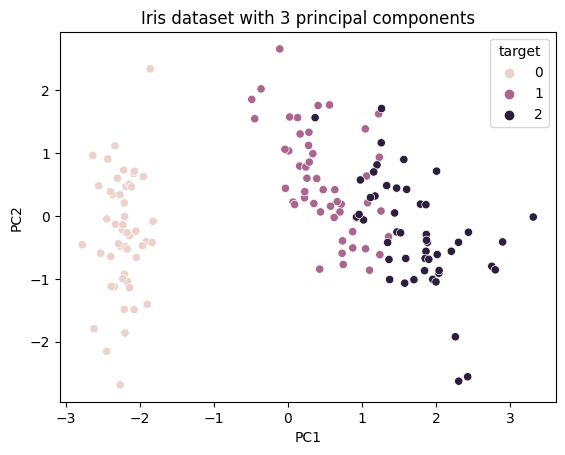

In [485]:
# plot the data using a sns scatterplot
import seaborn as sns
sns.scatterplot(x='PC1', y='PC2', hue='target', data=df)
plt.title('Iris dataset with 3 principal components')
plt.show()

In [486]:
# now using logistic regression with PCA n=3 components
iris = load_iris()
X = iris.data
y = iris.target

In [487]:
# Before applying PCA let's standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [488]:
# Apply PCA and keep the first 3 components
pca = PCA(n_components=3) # keep the first 3 principal components
X_pca = pca.fit_transform(X_scaled) # Transform the input data using the PCA fit above but with the scaled data (0-1)

In [489]:
# check the shape of the transformed data
X_pca.shape

(150, 3)

In [490]:
# Split the data into training/testing sets (70% for training and 30% for testing)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42)

In [491]:
# Create logistic regression object
model_pca = LogisticRegression()


In [492]:
# Fit the model using the training sets
model_pca.fit(X_train_pca, y_train_pca)

LogisticRegression()

In [493]:
# Make predictions using the testing set
y_pred_pca = model_pca.predict(X_test_pca)

In [494]:
# report the performance using 4 metrics (accuracy, precision, recall, f1-score)
print("Accuracy: %.2f" % accuracy_score(y_test_pca, y_pred_pca))
print("Precision: %.2f" % precision_score(y_test_pca, y_pred_pca, average='weighted'))
print("Recall: %.2f" % recall_score(y_test_pca, y_pred_pca, average='weighted'))
print("F1-Score: %.2f" % f1_score(y_test_pca, y_pred_pca, average='weighted'))

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00


Based on these scores we can see basically perfect results but there are many reasons to this: (small dataset, overfitting, random_state, etc.)

I will be using cross-validation to get a better idea of the model's performance and recheck the scores.

In [495]:
# cross-validation
from sklearn.model_selection import cross_val_score
# standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [496]:
# Apply PCA and keep the first 3 components
pca = PCA(n_components=3) # keep the first 3 principal components
X_pca = pca.fit_transform(X_scaled) # Transform the input data using the PCA fit above but with the scaled data (0-1)

In [497]:
# create a new logistic regression object
log_reg = LogisticRegression()

In [498]:
accuracy_scores = cross_val_score(log_reg, X_pca, y, cv=5, scoring='accuracy')
precision_scores = cross_val_score(log_reg, X_pca, y, cv=5, scoring='precision_weighted')
recall_scores = cross_val_score(log_reg, X_pca, y, cv=5, scoring='recall_weighted')
f1_scores = cross_val_score(log_reg, X_pca, y, cv=5, scoring='f1_weighted')

In [499]:
print(f"Accuracy: {accuracy_scores.mean():.2f} +/- {accuracy_scores.std():.2f}")
print(f"Precision: {precision_scores.mean():.2f} +/- {precision_scores.std():.2f}")
print(f"Recall: {recall_scores.mean():.2f} +/- {recall_scores.std():.2f}")
print(f"F1-score: {f1_scores.mean():.2f} +/- {f1_scores.std():.2f}")

Accuracy: 0.96 +/- 0.04
Precision: 0.96 +/- 0.04
Recall: 0.96 +/- 0.04
F1-score: 0.96 +/- 0.04


These results indicate that the model is performing quite well on the Iris dataset. The cross-validation scores provide a more accurate and reliable estimate of the model's performance, compared to using a single train-test split. We must keep in mind though that the performance may differ significantly if applied to a much larger dataset which is more complex.

QUESTION 4:

In [500]:
# Train it using L1 and L2 regularization and compare the results
iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Train and evaluate models with L1 and L2 regularization
log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear')
log_reg_l1.fit(X_train, y_train)
y_pred_l1 = log_reg_l1.predict(X_test)

accuracy_l1 = accuracy_score(y_test, y_pred_l1)
precision_l1 = precision_score(y_test, y_pred_l1, average='weighted')
recall_l1 = recall_score(y_test, y_pred_l1, average='weighted')
f1_l1 = f1_score(y_test, y_pred_l1, average='weighted')

log_reg_l2 = LogisticRegression(penalty='l2')
log_reg_l2.fit(X_train, y_train)
y_pred_l2 = log_reg_l2.predict(X_test)

accuracy_l2 = accuracy_score(y_test, y_pred_l2)
precision_l2 = precision_score(y_test, y_pred_l2, average='weighted')
recall_l2 = recall_score(y_test, y_pred_l2, average='weighted')
f1_l2 = f1_score(y_test, y_pred_l2, average='weighted')

# Compare the performance of the L1 and L2 regularized models
print("L1 Regularized Model:")
print(f"Accuracy: {accuracy_l1:.2f}")
print(f"Precision: {precision_l1:.2f}")
print(f"Recall: {recall_l1:.2f}")
print(f"F1-score: {f1_l1:.2f}")

print("\nL2 Regularized Model:")
print(f"Accuracy: {accuracy_l2:.2f}")
print(f"Precision: {precision_l2:.2f}")
print(f"Recall: {recall_l2:.2f}")
print(f"F1-score: {f1_l2:.2f}")


L1 Regularized Model:
Accuracy: 0.91
Precision: 0.93
Recall: 0.91
F1-score: 0.91

L2 Regularized Model:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00


As we can see, the L2 regularized model has the same performance as the previous model from Q3. This is because, by default, logistic regression in scikit-learn uses L2 regularization with the LogisticRegression() function. Therefore, the performance remains unchanged.

On the other hand, the L1 regularized model has slightly lower performance metrics than the L2 regularized and previous models. This could be due to L1 regularization driving some of the model's weights to zero, which may have led to slightly less accurate predictions.